#  American Airport Delays During the Last Decade

**by Giancarlo Marchesi** 

In this project, I explore the characteristics and causes of commercial airplane flight delays in the United States. I want to investigate what months delays are most likely to occur and which airline carriers and airports have the best and worst track records for delays.

The dataset corresponds to airline flight statistics and delay causes for airports in the United States. The observations are reported by month, year, airline and airport for the period between January 2011 and December 2020. The data was downloaded from the Bureau of Transportation Statistics website https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp. The total number of observations for the clean dataset is 158,102.

The data centers around delays (measured in number of flights and total minutes delayed) and its five causes:
- Carrier delay
- Weather delay
- NAS delay
- Security delay
- Late aircraft delay

There are four cross sectional dimensions to the delay measurements: time (measured in years), seasonality (measured in months), airline carrier and airport. Transformations will be performed to create the variable `ontime` to measure timely flights, as the complement the delayed, cancelled and diverted categories to 100%. Since, as we will see, `ontime` and delayed flights add to more than 98% of all fligths. The final level of analysis is performed on the former two categories.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe, print statistics
delays= pd.read_csv('airline_delay_causes.csv')

In [3]:
# high-level overview of data shape and composition
delays.shape

(158340, 22)

In [4]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158340 entries, 0 to 158339
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 158340 non-null  int64  
 1    month               158340 non-null  int64  
 2   carrier              158340 non-null  object 
 3   carrier_name         158340 non-null  object 
 4   airport              158340 non-null  object 
 5   airport_name         158340 non-null  object 
 6   arr_flights          158102 non-null  float64
 7   arr_del15            157906 non-null  float64
 8   carrier_ct           158102 non-null  float64
 9    weather_ct          158102 non-null  float64
 10  nas_ct               158102 non-null  float64
 11  security_ct          158102 non-null  float64
 12  late_aircraft_ct     158102 non-null  float64
 13  arr_cancelled        158102 non-null  float64
 14  arr_diverted         158102 non-null  float64
 15   arr_delay       

In [5]:
delays.head(3)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2011,12,DL,Delta Air Lines Inc.,STL,"St. Louis, MO: St Louis Lambert International",396.0,34.0,13.90,0.68,...,12.89,0.0,0.0,1680.0,698.0,19.0,204.0,0.0,759.0,NaN
1,2011,12,DL,Delta Air Lines Inc.,STT,"Charlotte Amalie, VI: Cyril E King",42.0,4.0,3.09,0.00,...,0.00,0.0,0.0,93.0,75.0,0.0,18.0,0.0,0.0,NaN
2,2011,12,DL,Delta Air Lines Inc.,STX,"Christiansted, VI: Henry E. Rohlsen",3.0,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


### Variable descriptions

Each observation (row) provides data on the following: 


- `year`: year of the observation  
- `month` month of the observation 
- `carrier`: airline code 
- `carrier_name`: airline long form name
- `arr_flights`: total count of arriving flights in the observation  
- `arr_del15`: total count of delayed flights in the observation. It is the sum of the five _ct variables 
- `arr_diverted`:  count of flights diverted in the observation
- `arr_cancelled`: count of cancelled flights in the observation
- `carrier_ct`: count attributed to carrier as cause of flight delay in the observation           
- `weather_ct`: count attributed to weather as cause of flight delay in the observation              
- `nas_ct`: count attributed to nas as cause of flight delay in the observation                 
- `security_ct`: count attributed to security as cause of flight delay in the observation            
- `late_aircraft_ct`: count attributed to late aircraft arrival as cause of flight delay in the observation       
- `arr_delay`: total number of minutes delayed in the observation. It is the sum of the five _delay variables
- `carrier_delay`: number of minutes delayed attributed to the carrier in the observation       
-  `weather_delay`: number of minutes delayed attributed to the weather in the observation         
-  `nas_delay`:  number of minutes delayed attributed to the NAS in the observation         
-  `security_delay`: number of minutes delayed attributed to security concerns in the observation      
-  `late_aircraft_delay`:  number of minutes delayed attributed to late aircraft arrival in the observation 

We will analyze the percentage of flights delayed (or, conversely, percentage of flights on time) and the causes for delays across four dimensiones: time(`year`), seasonality (`month`), airline (`carrier`) and airport (`airport`).

### Data cleaning

#### Getting rid of blank spaces in certain variable names

In [3]:
delays=delays.rename(columns = {' month': 'month', ' weather_ct': 'weather_ct', ' arr_delay': 'arr_delay', ' carrier_delay': 'carrier_delay'})

In [4]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158340 entries, 0 to 158339
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 158340 non-null  int64  
 1   month                158340 non-null  int64  
 2   carrier              158340 non-null  object 
 3   carrier_name         158340 non-null  object 
 4   airport              158340 non-null  object 
 5   airport_name         158340 non-null  object 
 6   arr_flights          158102 non-null  float64
 7   arr_del15            157906 non-null  float64
 8   carrier_ct           158102 non-null  float64
 9   weather_ct           158102 non-null  float64
 10  nas_ct               158102 non-null  float64
 11  security_ct          158102 non-null  float64
 12  late_aircraft_ct     158102 non-null  float64
 13  arr_cancelled        158102 non-null  float64
 14  arr_diverted         158102 non-null  float64
 15  arr_delay        

#### Drop `Unnamed: 21` column.   

In [5]:
delays.drop('Unnamed: 21', axis='columns', inplace=True)

In [6]:
delays.dtypes

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

#### Exploring the variables

##### `carrier` & `carrier_name`

There are 22 unique airlines, but 25 airline names.

In [11]:
delays.carrier.nunique()

22

In [12]:
delays.carrier_name.nunique()

25

We have a problem. There are more carrier names than carrier codes. Let's take a closer look.

In [11]:
explore=delays.filter(['carrier', 'carrier_name'], axis=1)

In [12]:
explore.groupby('carrier_name').describe()

carrier                  
                               count unique top   freq
carrier_name                                          
AirTran Airways Corporation     2314      1  FL   2314
Alaska Airlines Inc.            7421      1  AS   7421
Allegiant Air                   4287      1  G4   4287
American Airlines Inc.         10732      1  AA  10732
American Eagle Airlines Inc.    5208      1  MQ   5208
Atlantic Southeast Airlines     1442      1  EV   1442
Continental Air Lines Inc.       688      1  CO    688
Delta Air Lines Inc.           16389      1  DL  16389
Endeavor Air Inc.               4294      1  9E   4294
Envoy Air                       7473      1  MQ   7473
ExpressJet Airlines Inc.       14556      2  EV  13159
ExpressJet Airlines LLC         1436      1  EV   1436
Frontier Airlines Inc.          7870      1  F9   7870
Hawaiian Airlines Inc.          1983      1  HA   1983
JetBlue Airways                 7091      1  B6   7091
Mesa Airlines Inc.              6491      1  YV   6491
PSA Airlines Inc.               3290      1  OH   3290
Pinnacle Airlines Inc.           800      1  9E    800
Republic Airline                3086      1  YX   3086
SkyWest Airlines Inc.          22710      1  OO  22710
Southwest Airlines Co.         10072      1  WN  10072
Spirit Air Lines                2906      1  NK   2906
US Airways Inc.                 4073      1  US   4073
United Air Lines Inc.          10300      1  UA  10300
Virgin America                  1428      1  VX   1428

There are three carrier codes that need to be cleaned: <br>
After a quick Wikipedia search, i obtained the following data: 

-`EV`: there are 4 names associated to the carrier code EV. 
ExpressJet Airlines LLC and Atlantic Southeast Airlines. Atlantic SoutheEast Merged with ExpressJet and received a single  operating certificate from the FAA in December of 2011. 
Express Jet LLC eventually changed names to ExpressJet Airlines Inc, so the three names are the same company.
ExpressJet Airlines Inc has two carrier codes associated: EV and XE.

-`9E`: is now Endeavor Air, but was formerly called Pinnacle Airlines

-`MQ`: MQ is now Envoy Air, but was formerly American Eagle Airlines

**Let's analyze the ExpressJet problem more closely.**

In [7]:
## Keeping a df with only EV
df=delays.query('carrier == "EV"')

In [8]:
df.carrier_name.unique()

array(['Atlantic Southeast Airlines', 'ExpressJet Airlines Inc.',
       'ExpressJet Airlines LLC'], dtype=object)

In [9]:
## Keeping a df with only ExpressJet Airlines Inc.
df1=delays.query('carrier_name == "ExpressJet Airlines Inc."')

In [10]:
df1.carrier.unique()

array(['XE', 'EV'], dtype=object)

Let's get rid of the multiple names for EV, by replacing all with ExpressJet Airlines Inc

In [11]:
delays.carrier_name.replace({'Atlantic Southeast Airlines':'ExpressJet Airlines Inc.', 'ExpressJet Airlines LLC':'ExpressJet Airlines Inc.'}, inplace=True)

In [12]:
delays.carrier_name.nunique()

23

In [13]:
## Checking that the values have been replaced
delays.carrier_name.value_counts()

SkyWest Airlines Inc.           22710
ExpressJet Airlines Inc.        17434
Delta Air Lines Inc.            16389
American Airlines Inc.          10732
United Air Lines Inc.           10300
Southwest Airlines Co.          10072
Frontier Airlines Inc.           7870
Envoy Air                        7473
Alaska Airlines Inc.             7421
JetBlue Airways                  7091
Mesa Airlines Inc.               6491
American Eagle Airlines Inc.     5208
Endeavor Air Inc.                4294
Allegiant Air                    4287
US Airways Inc.                  4073
PSA Airlines Inc.                3290
Republic Airline                 3086
Spirit Air Lines                 2906
AirTran Airways Corporation      2314
Hawaiian Airlines Inc.           1983
Virgin America                   1428
Pinnacle Airlines Inc.            800
Continental Air Lines Inc.        688
Name: carrier_name, dtype: int64

Regarding the XE carrier code, according to wikipedia it belongs to JetSuiteX, an independent airline that does regional flights in the West Coast (California, Nevada, Arizona, Texas, Utah). It is not affiliated with ExpressJet in anyway https://en.wikipedia.org/wiki/JSX_(airline) This seems odd. Let's look a bit closer.

In [14]:
df2= delays.query('carrier == "XE"')

In [17]:
df2.sample(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
127772,2011,8,XE,ExpressJet Airlines Inc.,RIC,"Richmond, VA: Richmond International",488.0,118.0,45.25,3.34,...,0.03,50.12,28.0,1.0,7555.0,3074.0,355.0,1035.0,1.0,3090.0
95599,2011,4,XE,ExpressJet Airlines Inc.,JAX,"Jacksonville, FL: Jacksonville International",267.0,65.0,21.83,2.18,...,0.00,21.67,3.0,0.0,3687.0,1381.0,81.0,725.0,0.0,1500.0
91770,2011,1,XE,ExpressJet Airlines Inc.,TUL,"Tulsa, OK: Tulsa International",289.0,48.0,25.98,1.60,...,0.00,9.20,7.0,1.0,2290.0,1089.0,154.0,410.0,0.0,637.0
94278,2011,3,XE,ExpressJet Airlines Inc.,DEN,"Denver, CO: Denver International",1353.0,214.0,41.39,2.99,...,0.00,124.68,32.0,2.0,12567.0,3548.0,232.0,1454.0,0.0,7333.0
792,2011,12,XE,ExpressJet Airlines Inc.,EWR,"Newark, NJ: Newark Liberty International",2896.0,905.0,135.21,1.80,...,0.10,287.55,52.0,2.0,76693.0,15737.0,277.0,39245.0,4.0,21430.0


After looking at various samples, the airport destinations are not in the 5 states where JetSuiteX operates. On the contrary, these airports are Express Jet Airlines destinations. Furthermore, the observations for XE are all from 2011. It seems like this is an error in the data compilation. I will replace XE with EV for these observations.

In [18]:
delays.carrier.replace({'XE':'EV'}, inplace=True)

In [19]:
## XE has been replaced
delays.carrier.value_counts()

OO    22710
EV    17434
DL    16389
MQ    12681
AA    10732
UA    10300
WN    10072
F9     7870
AS     7421
B6     7091
YV     6491
9E     5094
G4     4287
US     4073
OH     3290
YX     3086
NK     2906
FL     2314
HA     1983
VX     1428
CO      688
Name: carrier, dtype: int64

Now, lets clean 9E and MQ.

In [20]:
delays.carrier_name.replace({'Pinnacle Airlines Inc.':'Endeavor Air Inc.', 'American Eagle Airlines Inc.':'Envoy Air'}, inplace=True)

In [21]:
dx=delays[delays['carrier'] == 'MQ'] 

In [22]:
dx.year.value_counts()

2019    1707
2020    1674
2012    1643
2011    1606
2018    1569
2013    1562
2014    1530
2015    1390
Name: year, dtype: int64

Although American Eagle eventually turned into Envoy,there are two years where they didn't operate, 2016 and 2017. We have to take this into account if we do yearly comparisons between airlines. 

In [23]:
delays.carrier_name.nunique()

21

In [24]:
delays.carrier.nunique()

21

*We now have the same number of carrier names as carrier codes.*

#####  `airport` & `airport_name`

The variable airport is the short form of name, whereas airport_name is the long form. There are 391 airports codes and airport names. This seems to be ok.

In [33]:
delays.airport.nunique()

391

In [34]:
delays.airport_name.nunique()

391

##### Creating `arr_ontime`

According to the BTS website, in December of 2020 of 87.09% of flights were on time, 11.72% were delayed, 1.04% were cancelled and 0.15% were diverted. Lets replicate this number and see if we understood the meaning of the variables correctly and if is necessary to generate transformations for further analysis.

In [25]:
## Creating a smaller dataframe for analysis
explore1=delays.filter(['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted'], axis=1)

In [26]:
explore1.head(5)

,arr_flights,arr_del15,arr_cancelled,arr_diverted
0,396.0,34.0,0.0,0.0
1,42.0,4.0,0.0,0.0
2,3.0,0.0,0.0,0.0
3,55.0,5.0,0.0,1.0
4,31.0,5.0,0.0,0.0


It seems that `arr_flights` is the amount of total flights. Although variables are floats, they are really whole numbers. We need a column that represents number of flights that arrived on time.

In [27]:
## This new variable would be the difference between total and other categories
delays['arr_ontime']=delays['arr_flights']-delays['arr_del15']-delays['arr_diverted']-delays['arr_cancelled']

In [28]:
explore2=delays.filter(['arr_flights','arr_ontime','arr_del15', 'arr_cancelled', 'arr_diverted'], axis=1)

In [29]:
explore2.head()

,arr_flights,arr_ontime,arr_del15,arr_cancelled,arr_diverted
0,396.0,362.0,34.0,0.0,0.0
1,42.0,38.0,4.0,0.0,0.0
2,3.0,3.0,0.0,0.0,0.0
3,55.0,49.0,5.0,0.0,1.0
4,31.0,26.0,5.0,0.0,0.0


*Now, replicating the numbers for December 2020.*

In [30]:
df_dec20 =delays[(delays.year == 2020) & (delays.month == 12)]

In [31]:
df_dec20.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_ontime
54084,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,...,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0,40.0
54085,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,...,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0,89.0
54086,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,...,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0,79.0
54087,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.0,...,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0,175.0
54088,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.0,...,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0,64.0


We were able to replicate the 87.09% from the BTS website for flights ontime. The variable `arr_ontime` is, therefore, representative of what we wanted to analyze. Other variables are replicated as well.

In [32]:
## Calculating the share of flights that arrived on time
df_dec20.arr_ontime.sum()/df_dec20.arr_flights.sum()

0.8708816583503206

In [43]:
## calulating the share of flights that were delayed
df_dec20.arr_del15.sum()/df_dec20.arr_flights.sum()

0.11722412664901968

In [44]:
## Calculating the share of cancelled flights
df_dec20.arr_cancelled.sum()/df_dec20.arr_flights.sum()

0.010367382330210551

##### Missing values

Next, let's check for null values, analyze their causes and take the necessary action. 

In [34]:
delays.isna().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            238
arr_del15              434
carrier_ct             238
weather_ct             238
nas_ct                 238
security_ct            238
late_aircraft_ct       238
arr_cancelled          238
arr_diverted           238
arr_delay              238
carrier_delay          238
weather_delay          238
nas_delay              238
security_delay         238
late_aircraft_delay    238
arr_ontime             434
dtype: int64

`arr_del15` has 434 missing values (0.3% of the total) and as a consequence, the recently created `arr_ontime`. Any analysis of number of delayed flights will need to exclude the months/airports that don't have information. Other delaty related values have 238 missing values. Since the numbers are small, we will delete the observations. 

In [35]:
delays.dropna(axis=0, inplace=True)

In [36]:
delays.isna().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
arr_ontime             0
dtype: int64

**There are no more NaN values.** 

In [38]:
delays.shape

(157906, 22)

##### Creating percentage variables for ontime and delay categories

Percentage variables for the four flight status: ontime, delayed, diverted or cancelled, will be particularly useful to create visualizations. In this section, we add them to the dataframe. 

In [39]:
delays['perontime']=delays['arr_ontime']/delays['arr_flights']

In [40]:
delays['perdelay']=delays['arr_del15']/delays['arr_flights']

In [41]:
delays['percancelled']=delays['arr_cancelled']/delays['arr_flights']

In [42]:
delays['perdiverted']=delays['arr_diverted']/delays['arr_flights']

In [43]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157906 entries, 0 to 158339
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 157906 non-null  int64  
 1   month                157906 non-null  int64  
 2   carrier              157906 non-null  object 
 3   carrier_name         157906 non-null  object 
 4   airport              157906 non-null  object 
 5   airport_name         157906 non-null  object 
 6   arr_flights          157906 non-null  float64
 7   arr_del15            157906 non-null  float64
 8   carrier_ct           157906 non-null  float64
 9   weather_ct           157906 non-null  float64
 10  nas_ct               157906 non-null  float64
 11  security_ct          157906 non-null  float64
 12  late_aircraft_ct     157906 non-null  float64
 13  arr_cancelled        157906 non-null  float64
 14  arr_diverted         157906 non-null  float64
 15  arr_delay        

The variable `arr_del15` is the number of flights that were delayed. The _ct variables are the counts of the causes of why flights were delayed. The sum of _ct variables is equal to `arr_del15`. The variables are floats instead of integers becuase airlines must have attributed more than one cause in percentages to several flights. Something more helpful for visualizations would be to have the percentages of causes attributed for delays.

In [45]:
#Making sure the previous hypothesis is correct
explore2=delays.filter(['arr_del15','carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct'], axis=1)

In [46]:
explore2.head(5)

,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
0,34.0,13.90,0.68,6.53,0.0,12.89
1,4.0,3.09,0.00,0.91,0.0,0.00
2,0.0,0.00,0.00,0.00,0.0,0.00
3,5.0,2.50,0.00,1.50,0.0,1.00
4,5.0,1.25,0.00,1.00,0.0,2.74


The hypothesis is correct. We will do no further EDA with this set of variables because `arr_delay` is more helpful for the analysis. The variable `arr_delay` is the total number of minutes that were delayed. The `_delay` variables are the minutes attributed to the causes. Something more helpful for the analysis would be to have the percentages of the causes as a total of delays versus the actual number in minutes.

In [48]:
## Zooming in and making sure the hypothesis is correct
explore3=delays.filter(['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'], axis=1)

In [49]:
explore3.head(5)

,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1680.0,698.0,19.0,204.0,0.0,759.0
1,93.0,75.0,0.0,18.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,147.0,80.0,0.0,35.0,0.0,32.0
4,332.0,92.0,0.0,39.0,0.0,201.0


To understand the true effects of weather on delays, we need to dive a bit deeper. According to the BTS website, https://www.bts.dot.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations
"A true picture of total weather-related delays requires several steps. First, the extreme weather delays must be combined with the NAS weather category. Second, a calculation must be made to determine the weather-related delays included in the "late-arriving aircraft" category. Airlines do not report the causes of the late-arriving aircraft but an allocation can be made using the proportion of weather related-delays and total flights in the other categories. Adding the weather-related delays to the extreme weather and NAS weather categories would result in weather's share of all flight delays".

Furthermore, according to BTS, "Delays or cancellations coded "NAS" are the type of weather delays that could be reduced with corrective action by the airports or the Federal Aviation Administration. During 2020, 45.8% of NAS delays were due to weather. NAS delays were 33.4% of total delays in 2020."

Although, NAS is an important factor in determining weather delays, the data set does not provide a vector with the share of NAS delays attributed to weather accross time. Hence, we cannot use this only point estimate from 2020 and attribute it to the whole dataset. Furthermore, the share of "late-arriving aircraft" seems to also be dependent on this first correction. Deriving conclusions from such an approximation would be innacurate. Hence, the cause of delays data will be analyzed at face value, across time, seasonality, carriers and airports, with the caveat that we now know that an important part of other delay causes are also weather related.

In other to perform futher analysis, we will create variables that represent the share of each delay cause in minutes to the total number of delay minutes in each abservation.

In [50]:
delays['per_car_delay']=delays['carrier_delay']/delays['arr_delay']

In [51]:
delays['per_wea_delay']=delays['weather_delay']/delays['arr_delay']

In [52]:
delays['per_nas_delay']=delays['nas_delay']/delays['arr_delay']

In [53]:
delays['per_sec_delay']=delays['security_delay']/delays['arr_delay']

In [54]:
delays['per_late_delay']=delays['late_aircraft_delay']/delays['arr_delay']

Some `arr_delays` could have been zeros, creating several NaN. We will fill them out with zeros. 

In [55]:
delays ['per_car_delay'] = delays['per_car_delay'].fillna(0)

In [56]:
delays ['per_wea_delay'] = delays['per_wea_delay'].fillna(0)

In [57]:
delays ['per_nas_delay'] = delays['per_nas_delay'].fillna(0)

In [58]:
delays ['per_sec_delay'] = delays['per_sec_delay'].fillna(0)

In [59]:
delays ['per_late_delay'] = delays['per_late_delay'].fillna(0)

In [60]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157906 entries, 0 to 158339
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 157906 non-null  int64  
 1   month                157906 non-null  int64  
 2   carrier              157906 non-null  object 
 3   carrier_name         157906 non-null  object 
 4   airport              157906 non-null  object 
 5   airport_name         157906 non-null  object 
 6   arr_flights          157906 non-null  float64
 7   arr_del15            157906 non-null  float64
 8   carrier_ct           157906 non-null  float64
 9   weather_ct           157906 non-null  float64
 10  nas_ct               157906 non-null  float64
 11  security_ct          157906 non-null  float64
 12  late_aircraft_ct     157906 non-null  float64
 13  arr_cancelled        157906 non-null  float64
 14  arr_diverted         157906 non-null  float64
 15  arr_delay        

The dataset is now clean and ready for analysis

## Features of interest and preliminary conclusions from data wrangling

**Conclusion 1**: the data centers around delays (measured in number of flights and total minutes delayed) and its five causes. There are four cross sectional dimensions to the delay measurements: time (measured in years), seasonality (measured in months), airline carrier and airport. Transformations were done to create the variable `arr_ontime` to measure timely flights, as the complement to delayed, cancelled and diverted flights.

**Conclusion 2**: the five tipes of delays, both measured as a fraction of flights (_ct) and minutes (_delays) are easier to read as percentage. Delays by minutes was considered the most relevant. Hence,transformations were made `_delays` variables before conducting the analysis.

**Conclusion 3**: there are observations for which ontime flights or delayed flights will be zero. Hence, we are bound to find several outliers on the bottom of the distribution. For now, the clean dataset is ready.

## Feature analysis

**Through univariate, bivariate and multivariate analysis, we will walk through the dataset to solve the following questions:** 
1) Have flight delays decreased over time?   
2) What is the most/least likely month for delays?    
3) What airports have the most/least delays?    
4) What airlines are most/least likely to have delays?   
5) What is the main cause for delays? 

**I would expect that delays have decreased over time, as technology and planning continues to improve. The most common months for delays should be those when the weather is more extreme (peak winter = February and peak summer= July). The airports with more delays should be the bigger ones. The busiest carriers should show the most delays. The main cause for delays should be the weather.** 

### Univariate analysis

#### How many observations are in the dataset per year?

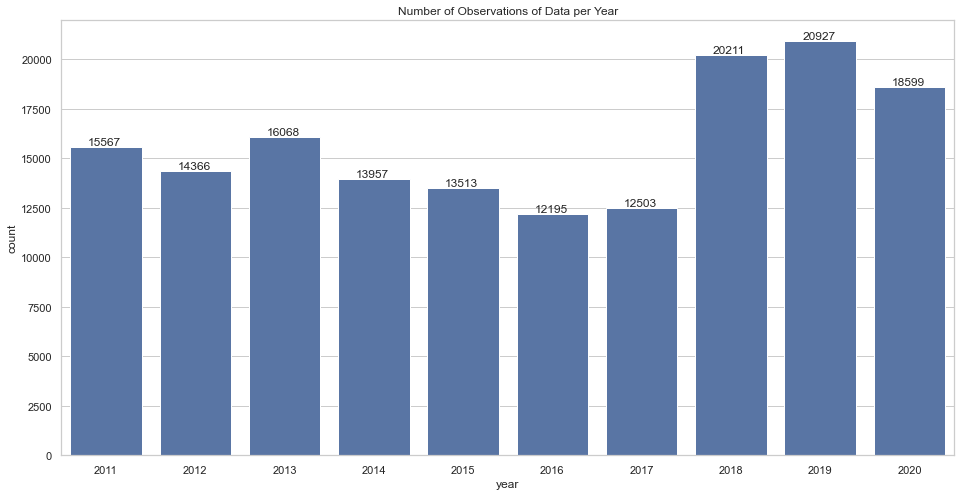

In [65]:
plt.figure(figsize=(16,8))
sns.set_theme(style="whitegrid")
base_color = sns.color_palette()[0]
ax=sns.countplot(data=delays, x='year', color=base_color)

plt.title('Number of Observations of Data per Year');

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+100))

*It seems a bit odd that ther are less observations in 2016 and 2017. If anything, we would have expected an increasing trend as there should be more airlines and/or more airports.*

#### Is there seasonality in the data?

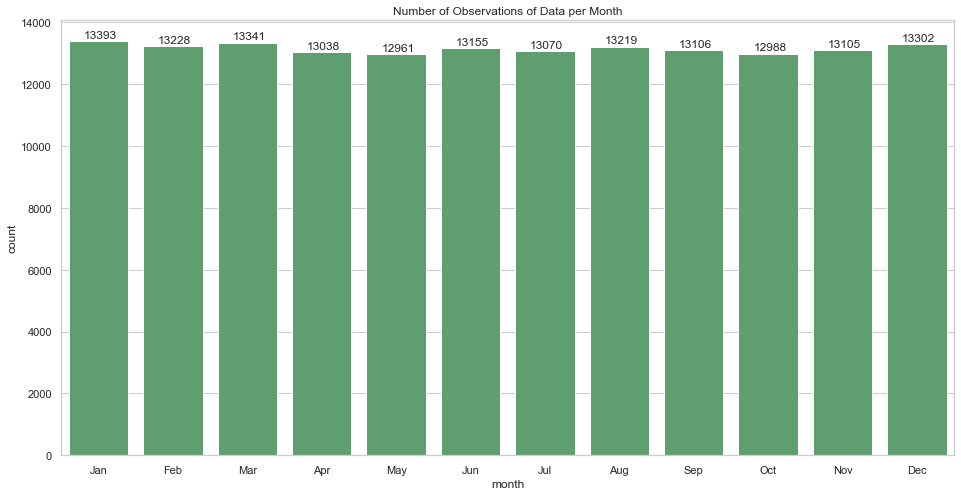

In [67]:
plt.figure(figsize=(16,8))
sns.set_theme(style="whitegrid")
base_color = sns.color_palette()[2]
ax=sns.countplot(data=delays, x='month', color=base_color)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Number of Observations of Data per Month');

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+100))

In [68]:
months=delays.month.value_counts()

In [69]:
months.describe()

count       12.000000
mean     13158.833333
std        139.296175
min      12961.000000
25%      13062.000000
50%      13130.500000
75%      13246.500000
max      13393.000000
Name: month, dtype: float64

There is a range of almost 400 observations between the month with most data January, and the month with the least data, May. So there is a very slight seasonality, though I would have expected December to be the month with most data points.

#### What airlines have the most observations?  

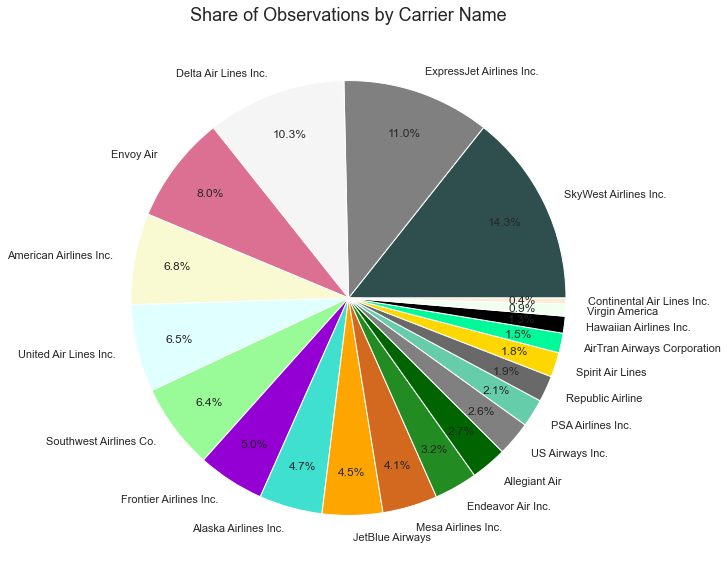

In [70]:
import random
import matplotlib.colors as mcolors
airlines = delays['carrier_name'].value_counts()
n_colors=delays['carrier_name'].nunique()
pie, ax = plt.subplots(figsize=[10,10])
labels = airlines.keys()
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = n_colors)
plt.pie(x=airlines, autopct="%.1f%%", labels=labels, colors=colors, pctdistance=0.8, counterclock=True, startangle=0)
plt.title("Share of Observations by Carrier Name", fontsize=18);

Five airlines: Skywest Airlines, Express Jet Airlines, Delta Airlines, Envoy Air and American Airlines represent more than 50%  of the observations. The bottom 12 airlines represent a little more than a quarter of all observations. 

#### What airports have the most observations?

In [71]:
airports=delays.airport.value_counts()

In [72]:
airports.describe() 

count     387.000000
mean      408.025840
std       428.061826
min         1.000000
25%        95.500000
50%       200.000000
75%       600.500000
max      1477.000000
Name: airport, dtype: float64

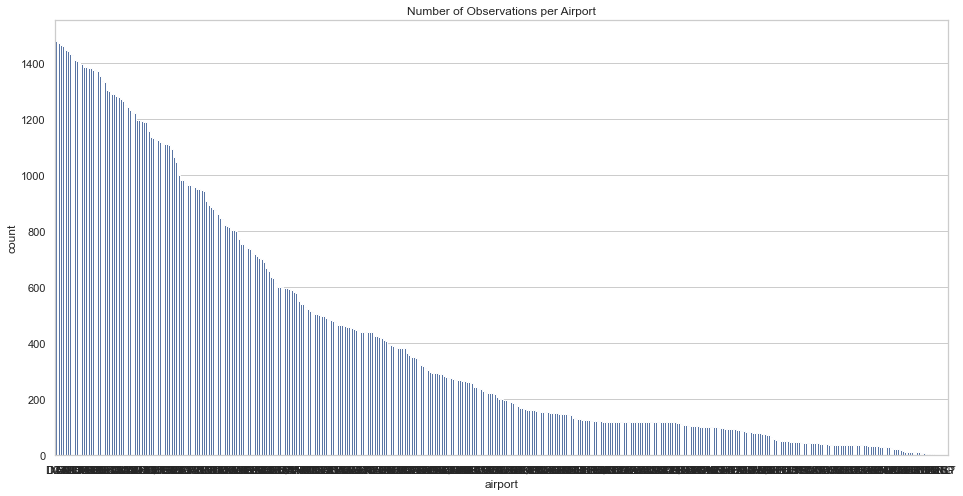

In [75]:
plt.figure(figsize=(16,8))
base_color = sns.color_palette()[0]
freq = airports
gen_order = freq.index
sns.countplot(data=delays, x='airport', color=base_color, order=gen_order).set_title("Number of Observations per Airport");

A visual serves to understand the shape of the distribution of # of observations per airport. The median is 200, the mean is 407. Yet there is a high concentration of observations in the largest airports. 

In [76]:
airporttop10=delays.airport.value_counts().head(10)

In [77]:
airporttop10

DCA    1477
DTW    1470
MSY    1462
ATL    1461
LAX    1445
RDU    1443
AUS    1432
MCI    1428
PIT    1410
PHL    1405
Name: airport, dtype: int64

On average, the top ten airports, by number of observations, reported data every month (10 years times 12 months) and at least 12 airlines to total more than 1400 observations. The median airport could have also reported for every month, but on average, for 1,6 airlines. The tail of the distribution (the last quartile) has less than one airline per month every year. However, these are not necessarily the busiest. We will cross in the bivariate analysis the number of flights.  

In [78]:
airportbot10=delays.airport.value_counts().tail(10)

In [79]:
airportbot10

FLO    6
UTM    5
TEX    4
IPT    3
VCT    2
ALS    2
FNL    1
YNG    1
TUP    1
JST    1
Name: airport, dtype: int64

### Bivariate Analysis

#### Why did the number of observations increase dramatically between the years 2017 and 2018 (from 12508 to 20214)?

In [80]:
df2017=delays.query('year == 2017')

In [81]:
df2017=df2017.sort_values(by=['carrier'], ascending=False)

In [82]:
df2018=delays.query('year == 2018')

In [83]:
df2018=df2018.sort_values(by=['carrier'], ascending=False)

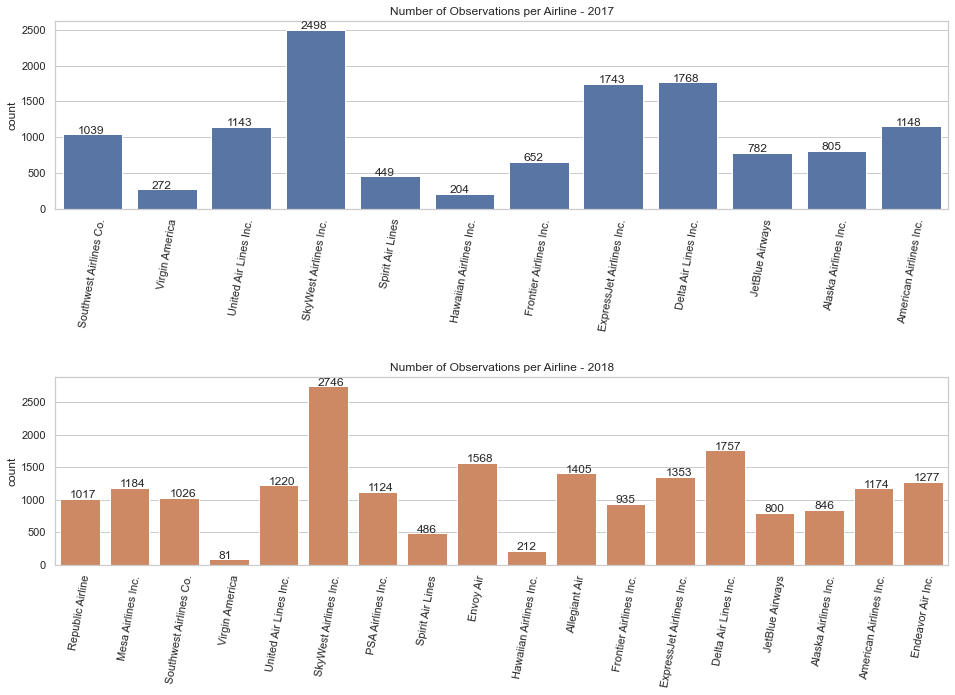

In [92]:
fig=plt.figure(figsize = [16, 10])
fig.subplots_adjust(hspace=.9)
base_color = sns.color_palette()[0]

plt.subplot(2,1,1)
ax1=sns.countplot(data=df2017, x='carrier_name', color=base_color)
plt.title('Number of Observations per Airline - 2017')
plt.xticks(rotation=80);
ax1.set(xlabel=None)
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+10))


plt.subplot(2,1,2)
base_color2 = sns.color_palette()[1]
ax2=sns.countplot(data=df2018, x='carrier_name', color=base_color2)
plt.title('Number of Observations per Airline - 2018');
plt.xticks(rotation=80);
ax2.set(xlabel=None)
for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+10))



In 2018, 6 new airlines show in the database. Republic Airline, Mesa Airlines, PSA Airlines, Envoy Air, Allegiant Air and Endeavor Air. That´s why there is a significant increase in 2018.

#### Has timeliness improved over time?

Let's investigate the mean value of 'ontime' in each year of the sample.

In [93]:
df3=delays.groupby('year')

In [94]:
ontime_x=(df3.perontime.mean())*100

In [95]:
df4=pd.DataFrame(ontime_x)

In [96]:
df4.reset_index(inplace=True)

In [97]:
df4=df4.round({'perontime': 1})

In [98]:
df4

,year,perontime
0,2011,78.5
1,2012,81.2
2,2013,77.3
3,2014,75.3
4,2015,78.9
5,2016,81.5
6,2017,80.0
7,2018,78.6
8,2019,78.4
9,2020,83.8


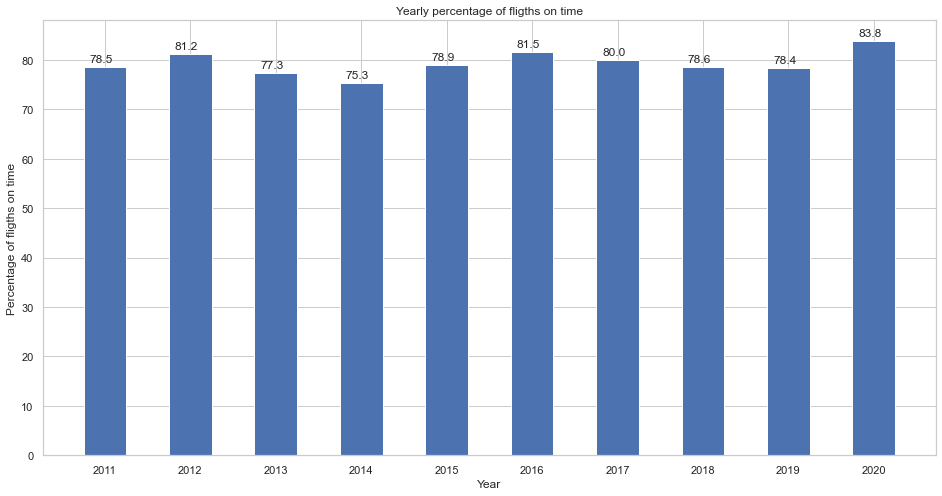

In [99]:
plt.figure(figsize=(16,8))
x = df4.year
y = df4.perontime

bars=plt.bar(x, height=y, width=.5)

plt.xlabel('Year')
plt.ylabel('Percentage of fligths on time')
plt.xticks(df4['year'])
plt.title('Yearly percentage of fligths on time')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.07, yval + 1, yval)

plt.show()

Although there has been a marked improvement between 2019 and 2020 in share of flights ontime, there doesn't seem to be a trend of improved timeliness that would show technological or logistic improvements. Perhaps the weather (something random) may play a factor on why certain years have more ontime flights. Also, there doesn't seem to be a significant change between 2017 and 2018, when 6 new airlines where added to the database. Now let's analyze this yearly information at the percentile level.

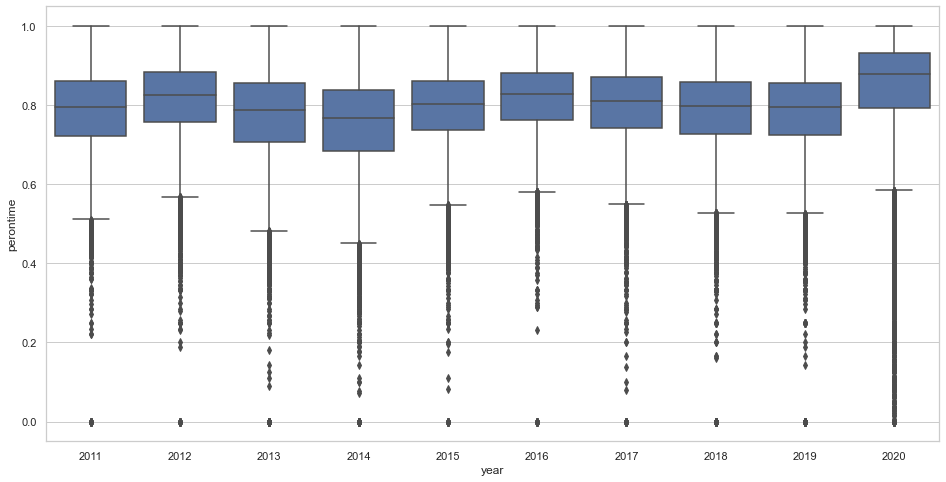

In [101]:
plt.figure(figsize=(16,8))
base_color = sns.color_palette()[0]
sns.boxplot(data=delays, x='year', y='perontime', color=base_color);

The year 2020 presents a higher percentage of ontime fligths, with a higher median and 75th percentile, yet it still shows quite a few outliers at the bottom of the distribution. The boxplot doesn't signal a marked improvement of percentage of flights on time during the decade. For instance, 2012 is arroung the same level of 2017-2019, although the highest value is in 2020.

#### Are there particular months where fligths are more likely to be on time?

In [102]:
df5=delays.groupby('month')

In [103]:
ontime_y=(df5.perontime.mean())*100

In [104]:
df6=pd.DataFrame(ontime_y)

In [105]:
df6.reset_index(inplace=True)

In [106]:
df6=df6.round({'perontime': 1})

In [107]:
df6

,month,perontime
0,1,77.2
1,2,77.4
2,3,78.6
3,4,77.4
4,5,80.1
5,6,76.3
6,7,76.8
7,8,78.8
8,9,84.3
9,10,83.8


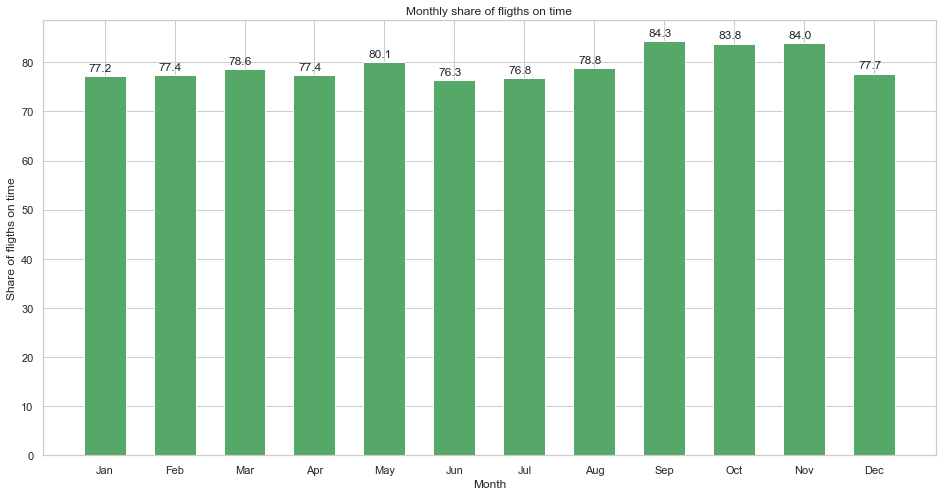

In [109]:
plt.figure(figsize=(16,8))
base_color = sns.color_palette()[2]
x = df6.month
y = df6.perontime

xlabels=(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

bars=plt.bar(x, height=y, width=.6, color=base_color)

plt.xlabel('Month')
plt.ylabel('Share of fligths on time')
plt.xticks(x, xlabels, rotation=0)
plt.title('Monthly share of fligths on time')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.075, yval + 1, yval)

plt.show()

Share of flights on time peaks during fall (September to November) and decreases during summer, especially in June and July, but also April. We will further investigate the possible causes of this phenomenon.  

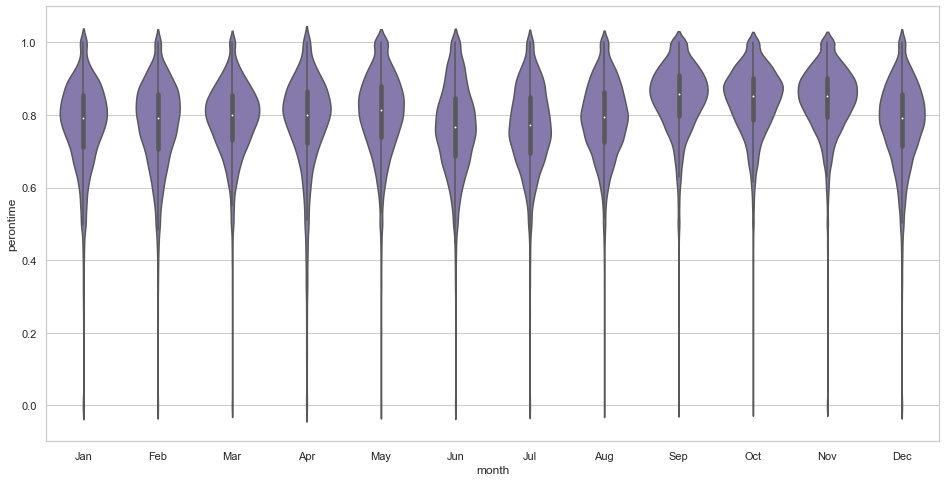

In [113]:
plt.figure(figsize=(16,8))
base_color = sns.color_palette()[4]

ax=sns.violinplot(data=delays, x='month', y='perontime', color=base_color, innner=None)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

#### Are there particular airlines that are more likely to be on time?

In [114]:
df7=delays.groupby('carrier_name')

In [115]:
ontime_z=(df7.perontime.mean())*100

In [116]:
df8=pd.DataFrame(ontime_z)

In [117]:
df8.reset_index(inplace=True)

In [118]:
df8=df8.round({'perontime': 1})

In [119]:
df8=df8.sort_values(by=['perontime'], ascending=False)

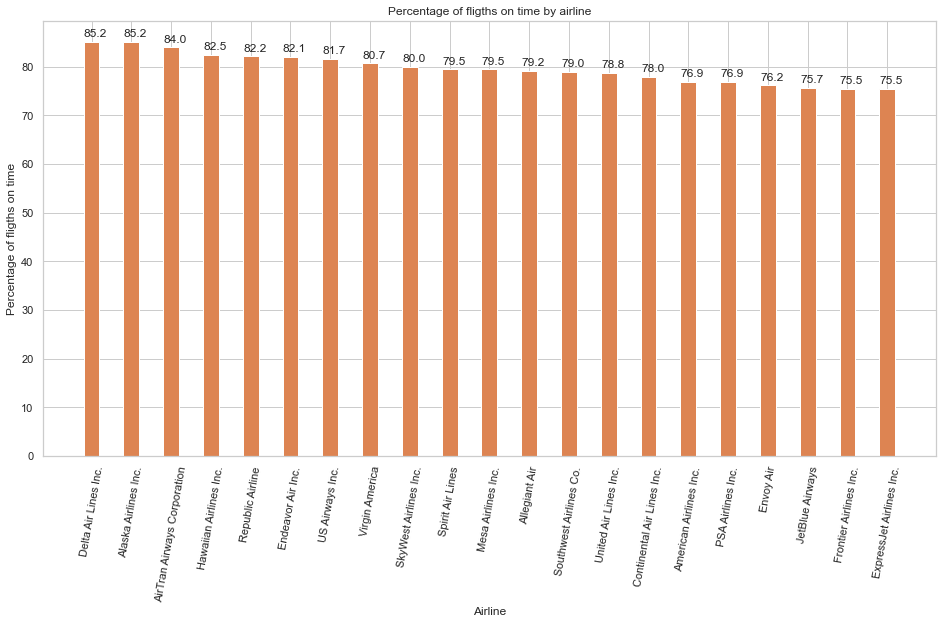

In [121]:
plt.figure(figsize=(16,8))
base_color = sns.color_palette()[1]
x = df8.carrier_name
y = df8.perontime

bars=plt.bar(x, height=y, width=.4, color=base_color)

plt.xlabel('Airline')
plt.ylabel('Percentage of fligths on time')
plt.title('Percentage of fligths on time by airline')
plt.xticks(df8['carrier_name'], rotation=80)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01, yval + 1, yval)

plt.show()

Only one of the five busiest airlines, Delta, is also among the top 5 airlines most likely to be on time. It's actually number 1. On the contrary, Express Jet Airlines, the busiest airline is also the one least likely to be on time.

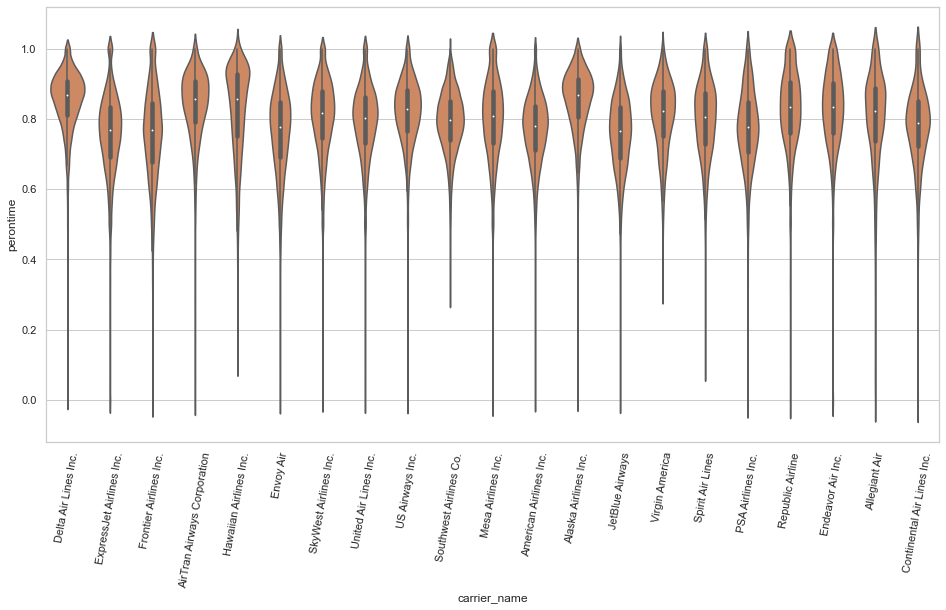

In [123]:
plt.figure(figsize=(16,8))
base_color = sns.color_palette()[1]

sns.violinplot(data=delays, x='carrier_name', y='perontime', color=base_color, innner=None)
plt.xticks(rotation=80);

We can observe that the Delta and Alaska Airlines, the top 2 in terms of percentage on time, have fatter distributions above 0.8, whereas ExpressJet Airlines has a leaner and longer distributions, with most of observations below 0.8. All carriers, except Southwest go to 0 because they have observations where certain airports had either cancelled or diverted flights. In such cases, as we saw during data wrangling, there were no flights on time.

#### Which are the busiest airports?

We are going to need to work with a smaller subset in order to produce visualizations that are understandable. The subset will be of the 50 busiest airports. For visualizations and the subsequent multivariate analysis, we will add the column of `per_ontime` and `per_nas_delay`.

In [170]:
#Creating a dataframe with the total number of flights per airport
df9=delays.groupby('airport').arr_flights.sum()

In [171]:
df9

airport
ABE     31189.0
ABI     19261.0
ABQ    240062.0
ABR      6525.0
ABY      9417.0
         ...   
XNA    103829.0
XWA       858.0
YAK      7235.0
YNG         2.0
YUM     22969.0
Name: arr_flights, Length: 387, dtype: float64

In [172]:
df9=pd.DataFrame(df9)

In [173]:
df9.reset_index(inplace=True)

In [174]:
df9

,airport,arr_flights
0,ABE,31189.0
1,ABI,19261.0
2,ABQ,240062.0
3,ABR,6525.0
4,ABY,9417.0
...,...,...
382,XNA,103829.0
383,XWA,858.0
384,YAK,7235.0
385,YNG,2.0


In [177]:
## creating a dataframe grouped by airport with the averager percentage on time
df10=delays.groupby('airport').perontime.mean()

In [178]:
df10=pd.DataFrame(df10)

In [179]:
df10.reset_index(inplace=True)

In [180]:
df10

,airport,perontime
0,ABE,0.805606
1,ABI,0.783456
2,ABQ,0.795016
3,ABR,0.879055
4,ABY,0.805923
...,...,...
382,XNA,0.789296
383,XWA,0.852818
384,YAK,0.845023
385,YNG,0.000000


In [182]:
## Creating a data frame with the percentage of NAS Delays
df11=delays.groupby('airport').per_nas_delay.mean()

In [183]:
df11=pd.DataFrame(df11)

In [184]:
df11.reset_index(inplace=True)

In [185]:
df11

,airport,per_nas_delay
0,ABE,0.173965
1,ABI,0.158296
2,ABQ,0.193754
3,ABR,0.162024
4,ABY,0.133247
...,...,...
382,XNA,0.196710
383,XWA,0.106423
384,YAK,0.178690
385,YNG,0.184874


In [187]:
## Merging into one dataframe
analysis=df9.merge(df10, left_on='airport', right_on='airport', how='inner')

In [189]:
## Merging into one dataframe
analysis=analysis.merge(df11, left_on='airport', right_on='airport', how='inner')

In [190]:
analysis

,airport,arr_flights,perontime,per_nas_delay
0,ABE,31189.0,0.805606,0.173965
1,ABI,19261.0,0.783456,0.158296
2,ABQ,240062.0,0.795016,0.193754
3,ABR,6525.0,0.879055,0.162024
4,ABY,9417.0,0.805923,0.133247
...,...,...,...,...
382,XNA,103829.0,0.789296,0.196710
383,XWA,858.0,0.852818,0.106423
384,YAK,7235.0,0.845023,0.178690
385,YNG,2.0,0.000000,0.184874


In [191]:
top50=analysis.sort_values(by=['arr_flights'], ascending=False).head(50)

In [192]:
top50

,airport,arr_flights,perontime,per_nas_delay
22,ATL,3722461.0,0.791265,0.254352
266,ORD,2904196.0,0.765512,0.392068
101,DFW,2544726.0,0.785161,0.289909
100,DEN,2277745.0,0.788830,0.272361
205,LAX,2086063.0,0.786844,0.252294
281,PHX,1653770.0,0.808552,0.215341
329,SFO,1597549.0,0.730671,0.423870
175,IAH,1589806.0,0.790201,0.309382
78,CLT,1498927.0,0.778265,0.232080
203,LAS,1450281.0,0.811591,0.227235


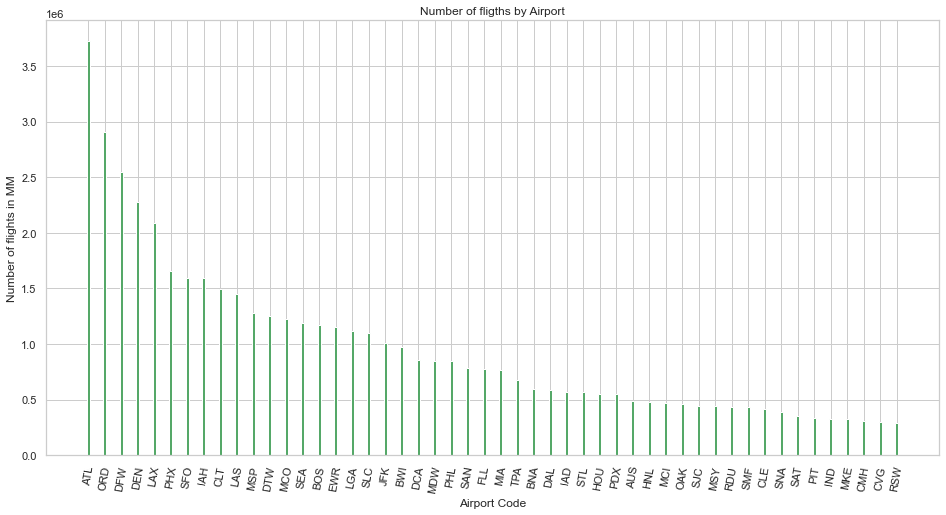

In [193]:
plt.figure(figsize=(16,8))
base_color = sns.color_palette()[2]
x = top50.airport
y = top50.arr_flights

bars=plt.bar(x, height=y, width=.2, color=base_color)

plt.xlabel('Airport Code')
plt.ylabel('Number of flights in MM')
plt.title('Number of fligths by Airport')
plt.xticks(top50['airport'], rotation=80)

plt.show()

Atlanta, Chicago and Dallas-Fort Worth are the busiest airports in the United states. After the top 10, marked by Las Vegas (LAS), the number of flights decreases substantially. 

#### How do the different types of delays vary across months?

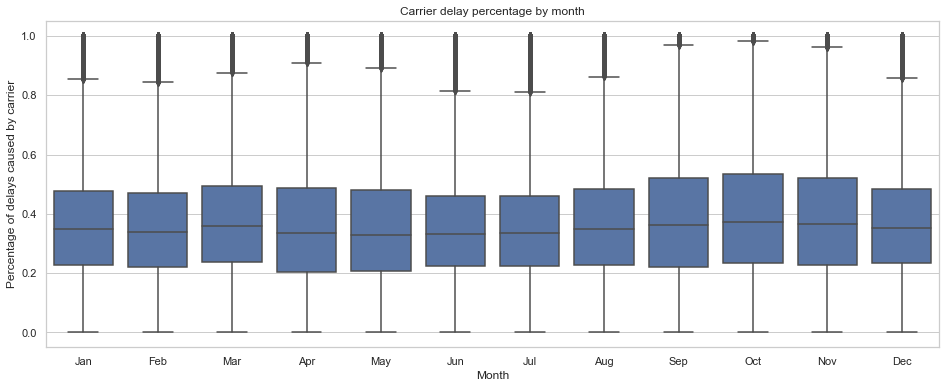

In [151]:
## Carrier delays accross months
plt.figure(figsize=(16,6))
base_color = sns.color_palette()[0]
ax=sns.boxplot(data=delays, x='month', y='per_car_delay', color=base_color)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Percentage of delays caused by carrier')
plt.title('Carrier delay percentage by month');

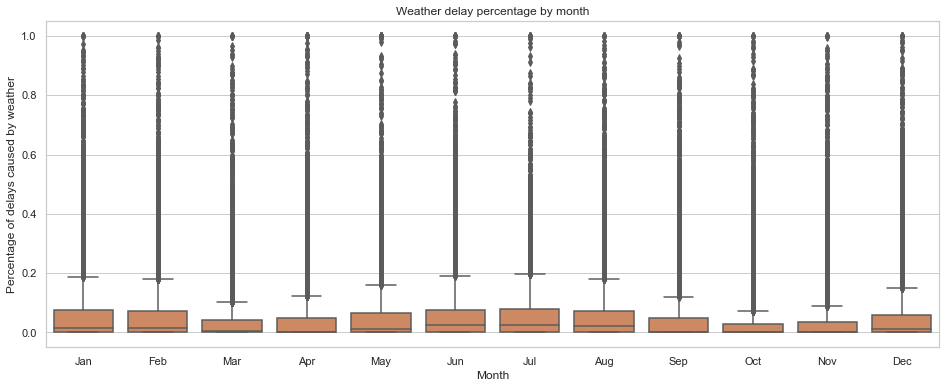

In [152]:
## Carrier delays accross months
plt.figure(figsize=(16,6))
base_color = sns.color_palette()[1]
ax=sns.boxplot(data=delays, x='month', y='per_wea_delay', color=base_color)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Percentage of delays caused by weather')
plt.title('Weather delay percentage by month');

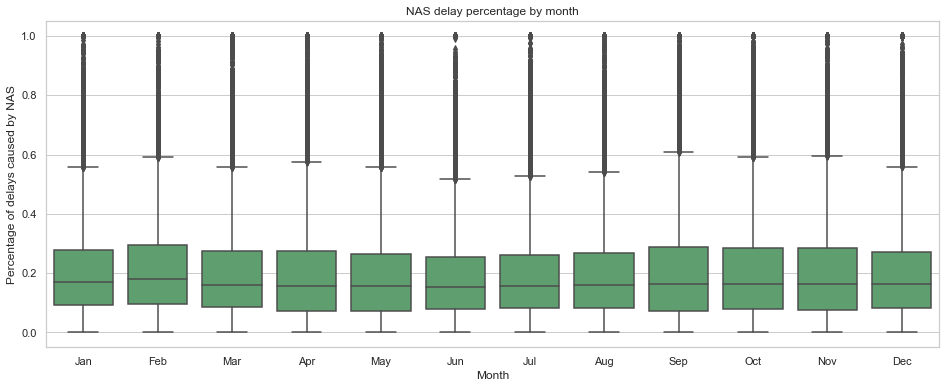

In [153]:
## Carrier delays accross months
plt.figure(figsize=(16,6))
base_color = sns.color_palette()[2]
ax=sns.boxplot(data=delays, x='month', y='per_nas_delay', color=base_color)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Percentage of delays caused by NAS')
plt.title('NAS delay percentage by month');

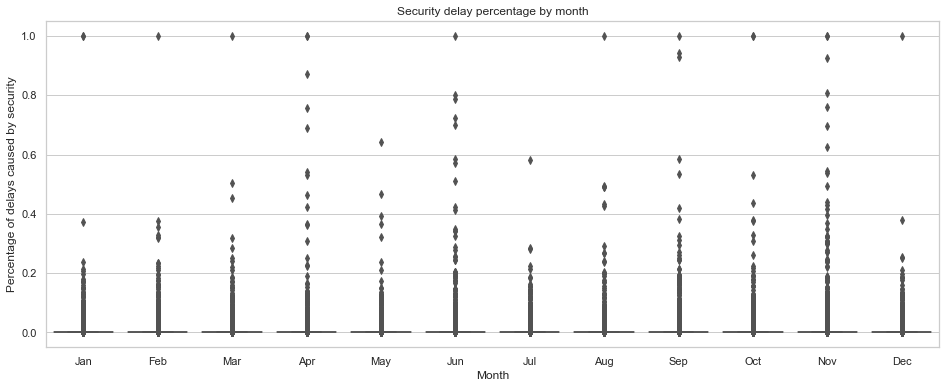

In [154]:
## Carrier delays accross months
plt.figure(figsize=(16,6))
base_color = sns.color_palette()[3]
ax=sns.boxplot(data=delays, x='month', y='per_sec_delay', color=base_color)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Percentage of delays caused by security')
plt.title('Security delay percentage by month');

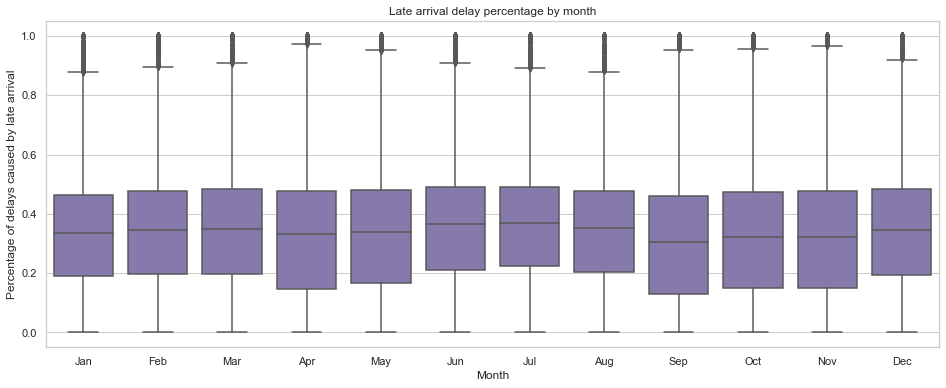

In [155]:
## Carrier delays accross months
plt.figure(figsize=(16,6))
base_color = sns.color_palette()[4]
ax=sns.boxplot(data=delays, x='month', y='per_late_delay', color=base_color)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Percentage of delays caused by late arrival')
plt.title('Late arrival delay percentage by month');

Carrier delay and late aircraft arrival are the most common causes for delays. Carrier delays are due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.). In the case of late aircraft arrival, a previous flight with same aircraft arrived late, causing the present flight to depart late. As we saw earlier in the BTS explanation, a proportion of this is attributable to weather. Hence, we do see a slight uptick during the months of January, June and July. This is the same pattern shown by weather delays. 

It makes sense to explore at the multivariate level, a) NAS delays at the airport level (as these refer to  abroad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control) as a proxy for airport efficiency; and b) Carrier delays at the airline level as a proxy for airline efficiency.

The cause "weather" doesnt' seem relevant at first glance, but we know that perhaps between 40 and 50% of NAS is attributable to weather as well, and the aformentioned proportion of late arriving aircraft. The BTS website publishes it's own calculations only at the yearly level, showing a proportion similar to 40% of all delays. **Hence weather and carrier are "the real" most important causes for delays**.

Now that we know the details, let's consolidate this into one visual that we can use for the presentation. 

In [157]:
share_carrier=delays.carrier_delay.sum()/delays.arr_delay.sum()

In [158]:
share_carrier.round(3)

0.313

In [159]:
share_weather=delays.weather_delay.sum()/delays.arr_delay.sum()

In [160]:
share_weather.round(3)

0.048

In [162]:
share_nas=delays.nas_delay.sum()/delays.arr_delay.sum()

In [97]:
share_nas.round(3)

0.239

In [163]:
share_security=delays.security_delay.sum()/delays.arr_delay.sum()

In [164]:
share_security.round(3)

0.001

In [165]:
share_late=delays.late_aircraft_delay.sum()/delays.arr_delay.sum()

In [166]:
share_late.round(3)

0.4

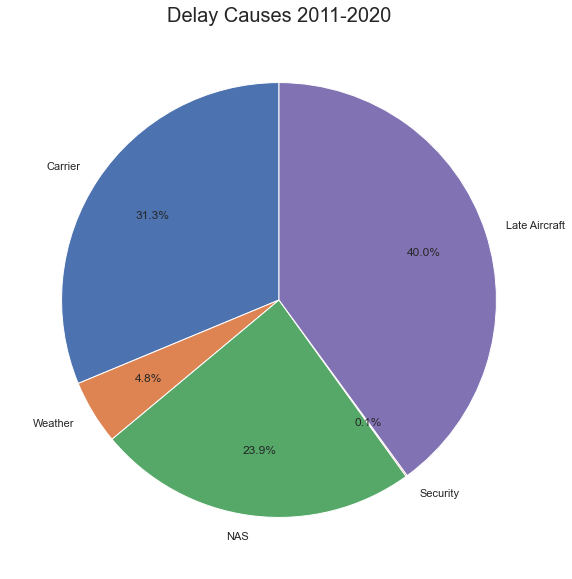

In [169]:
pie, ax = plt.subplots(figsize=[10,10]);
x=[0.313, 0.048, 0.239, 0.001, 0.4]
labels=["Carrier", "Weather", "NAS", "Security", "Late Aircraft"]
ax.pie(x, labels = labels,autopct='%1.1f%%', pctdistance=0.7, counterclock=True, startangle=90)
plt.title("Delay Causes 2011-2020", fontsize=20)
plt.show()

### Multivariate Analysis

#### Is airtraffic correlated with timeliness? If so, among these top 50 busiest aiports, which are the most likely to be on time?

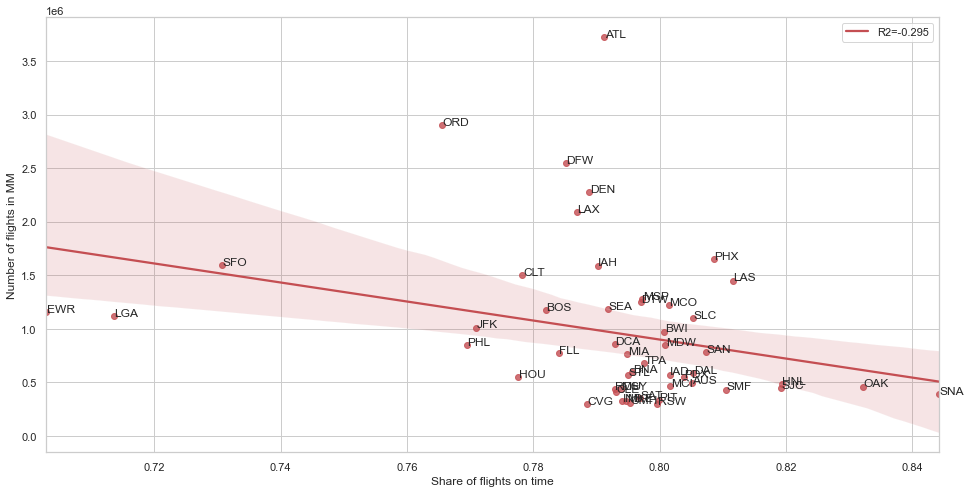

In [197]:
from scipy import stats
plt.figure(figsize=(16,8))
base_color = sns.color_palette()[3]

slope, intercept, r_value, p_value, std_err = stats.linregress(top50['perontime'],top50['arr_flights'])

ax = sns.regplot(x="perontime", y="arr_flights", data=top50, color=base_color, 
 line_kws={'label':"R2={0:.3f}".format(r_value)})

plt.xlabel('Share of flights on time')
plt.ylabel('Number of flights in MM')
ax.legend()

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.0001, point['y'], str(point['val']))

label_point(top50.perontime, top50.arr_flights, top50.airport, plt.gca())

plt.show(); 

At the top-50 airport level, there is negative correlation between number of flights and percentage of on-time flights, but the relationship is not that strong, (R2: -0.289). Despite the volume of flights, the percentage of on-time flights for most of airports is in the range between 78% and 80%. Santa Ana (SNA), Oakland (OAK), Honolulu (HNL) and San Jose (SJC) are the most likely to be on time. Conversely, Newark (EWR), La Guardia (LGA) and San Francisco(SFO) are the least likely to be in time.

#### Which of the carriers has the least delays?

In order to have a better understanding of ontime performance, we need to look deeper. It will be complex to do multivariate visualizations if we project all 21 carriers simultaneously. Therefore, we will work with a subsample of the top 5 airlines: Skywest Airlines, Express Jet Airlines, Delta Airlines, Envoy Air and American Airlines, which represent more than 50% of the observations. We replaced Envoy Air for United because it began operations in 2018. 

In [199]:
df12=delays.filter(['carrier', 'carrier_name', 'year', 'month', 'perontime', 'per_car_delay', 'per_nas_delay'], axis=1)

In [200]:
top5=df12.query('carrier_name in ["Delta Air Lines Inc.", "SkyWest Airlines Inc.", "ExpressJet Airlines Inc.", "United Air Lines Inc.", "American Airlines Inc."]')

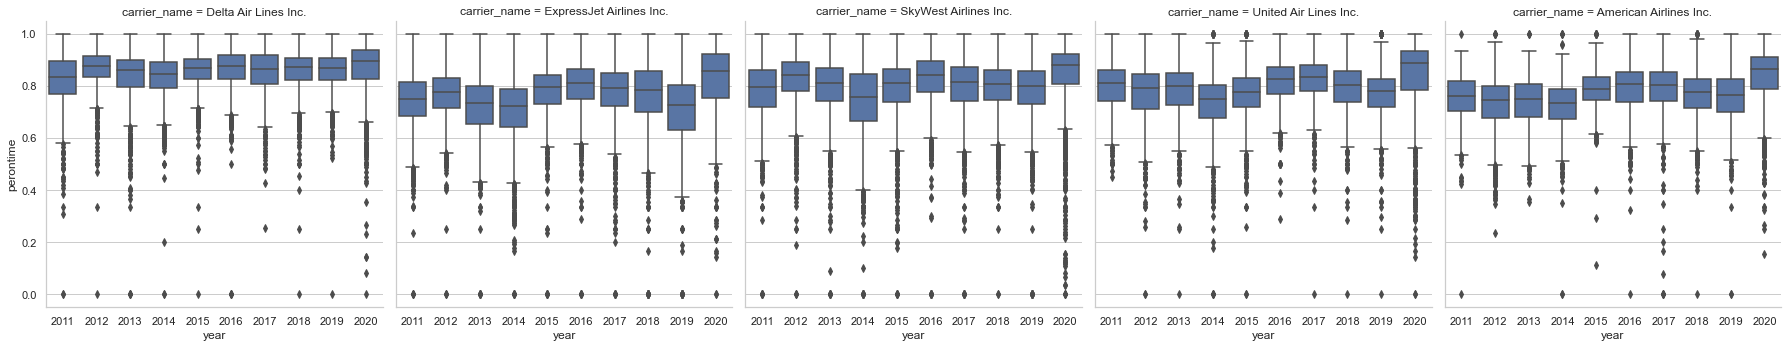

In [202]:
g = sns.FacetGrid(data = top5, col = 'carrier_name', size = 5)
g.map(sns.boxplot, 'year', 'perontime');

Delta has maintained a fairly even perfromance through the years, with a median value above 80% on time. 2020 is a year of contrasts, as it shows the highest median value yet a tail of outliers at the bottom of the distribution.  
ExpressJet Airlines is the most uneven performer of the top 5 airlines, with median values in all years except 2020 below 80%. 2014 seems to be the year with the lowest median value for percent of ontime flights for 4 of the top 5 airlines. In the case of Delta 2011 is the year with the lowest median value.  2020 was the year with the highest median value for each of the five airlines.  

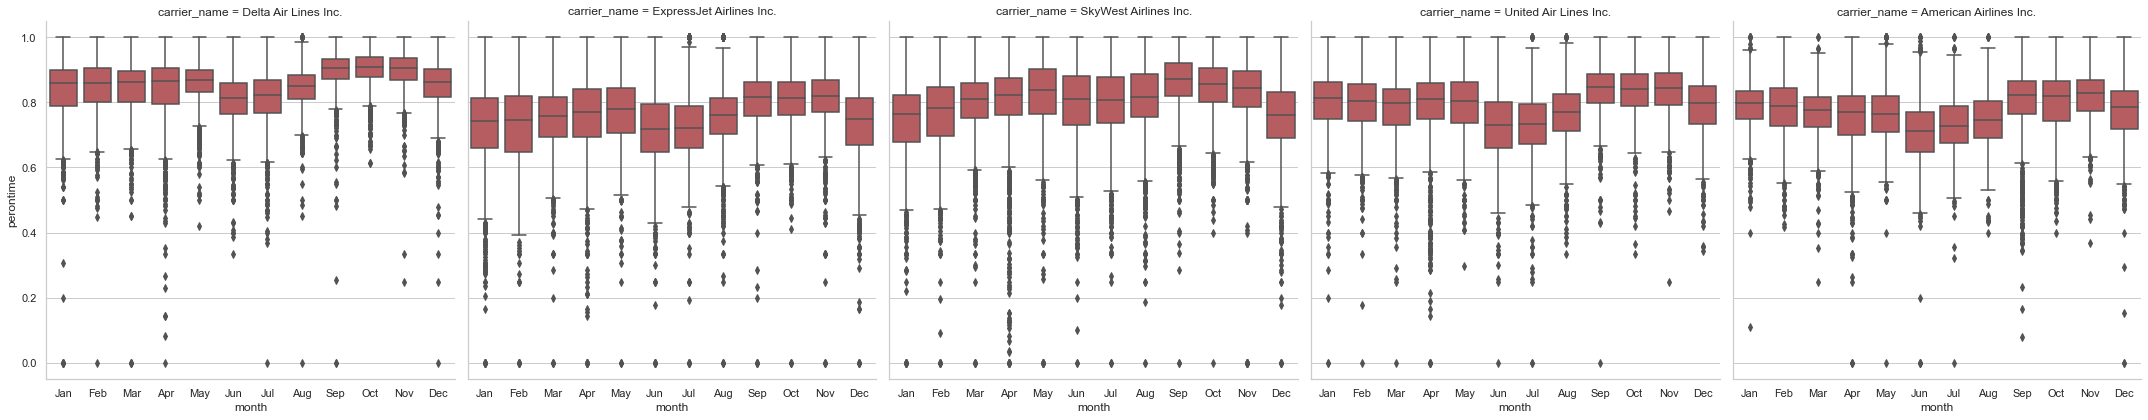

In [203]:
base_color = sns.color_palette()[3]
g = sns.FacetGrid(data = top5, col = 'carrier_name', size = 6)
g.map(sns.boxplot, 'month', 'perontime', color=base_color)
g.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

Seasonality impacts Delta, American, United and ExpressJet differently than Skywest Airlines. The first four are more likely to have delayed flights in the summer, during the months of June and July; whereas the latter is more likely to be delayed during the winter months of December, January and February.Skywest operates an average of more than 2,400 flights per day to 250 cities in the United States, Canada, Mexico with an extensive network of routes largely set up to connect passengers between smaller airports and the large hubs of its partner airlines. So, it is affected by weather all across North America, not just a specific region that could provide a hypothesis to why it is less punctual during the winter months.

#### Delays attributed exclusively to carriers 

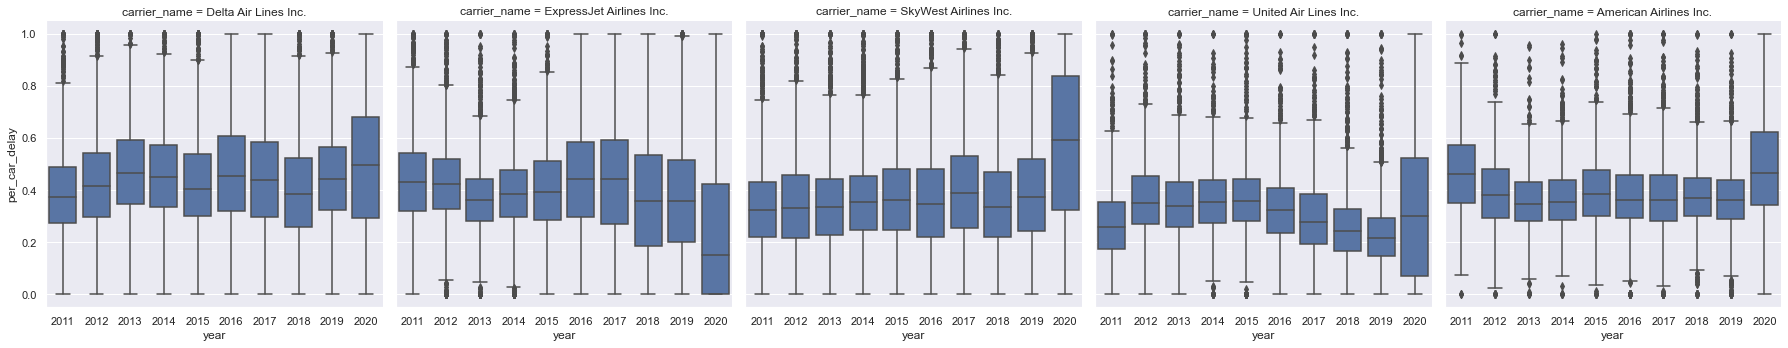

In [236]:
g = sb.FacetGrid(data = top5, col = 'carrier_name', size = 5)
g.map(sb.boxplot, 'year', 'per_car_delay');

The median value for the top 5 carriers ranges between 30 to 50%, except fot the year 2020, where the ranges seem to be more extreme. United Airlines, on average, shows less percentage of delays atributed to the carrier.

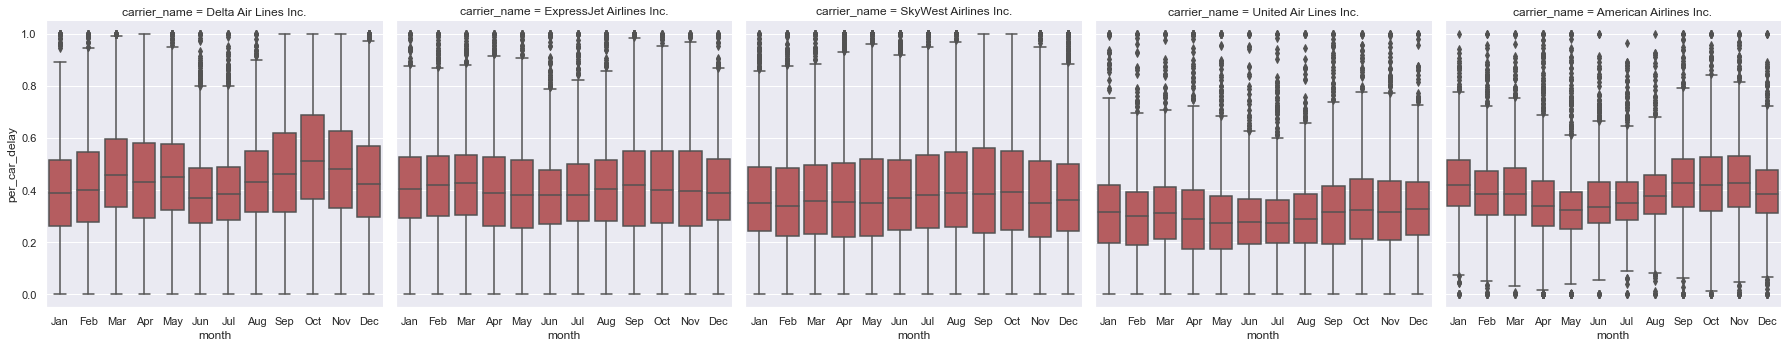

In [237]:
base_color = sb.color_palette()[3]
g = sb.FacetGrid(data = top5, col = 'carrier_name', size = 5)
g.map(sb.boxplot, 'month', 'per_car_delay', color=base_color);
g.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

Percentage of flights delayed by carrier are for the most part even across months, except for Delta and American, which suffer a small dip in the summer months, perhaps because weather becomes more of an issue and it's picked up in NAS, weather and late arrival delays.

#### On time performance at the airport level

In order to have a better understanding of ontime performance, we need to take a deeper dive. It will be complex to do multivariate visualizations if we project all 390 carriers simultaneously. Therefore, we will work with a subsample of the busiest 10 airports in two tiers: ATL, ORD, DFW, DEN, LAX, PHX, SFO, IAH, CLT, LAS.  

In [204]:
df13=delays.filter(['airport', 'year', 'month', 'perontime'], axis=1)

In [205]:
tier1=df13.query('airport in ["ATL", "ORD", "DFW", "DEN", "LAX"]')

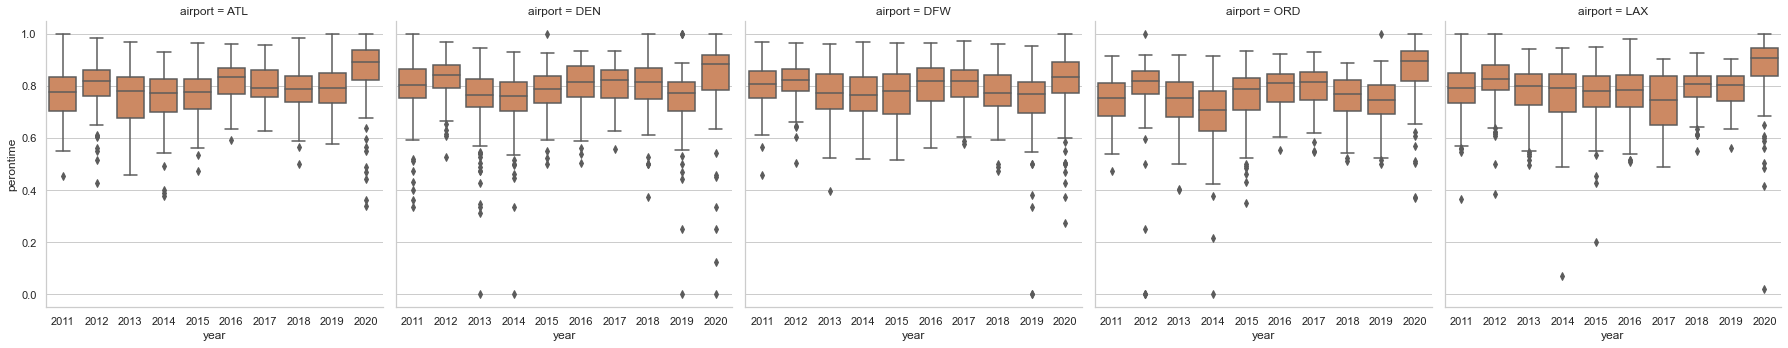

In [208]:
base_color = sns.color_palette()[1]
g = sns.FacetGrid(data = tier1, col = 'airport', size = 5)
g.map(sns.boxplot, 'year', 'perontime', color=base_color);

For all five airports in Tier 1, 2020 was the year with the highest percentage of flights on time, as measured by the median value and 75th percentile, though there are quite a few outliers in the bottom of the distribution. No particular is the lowest for all or most, like in the case of 2014 with the top airlines.

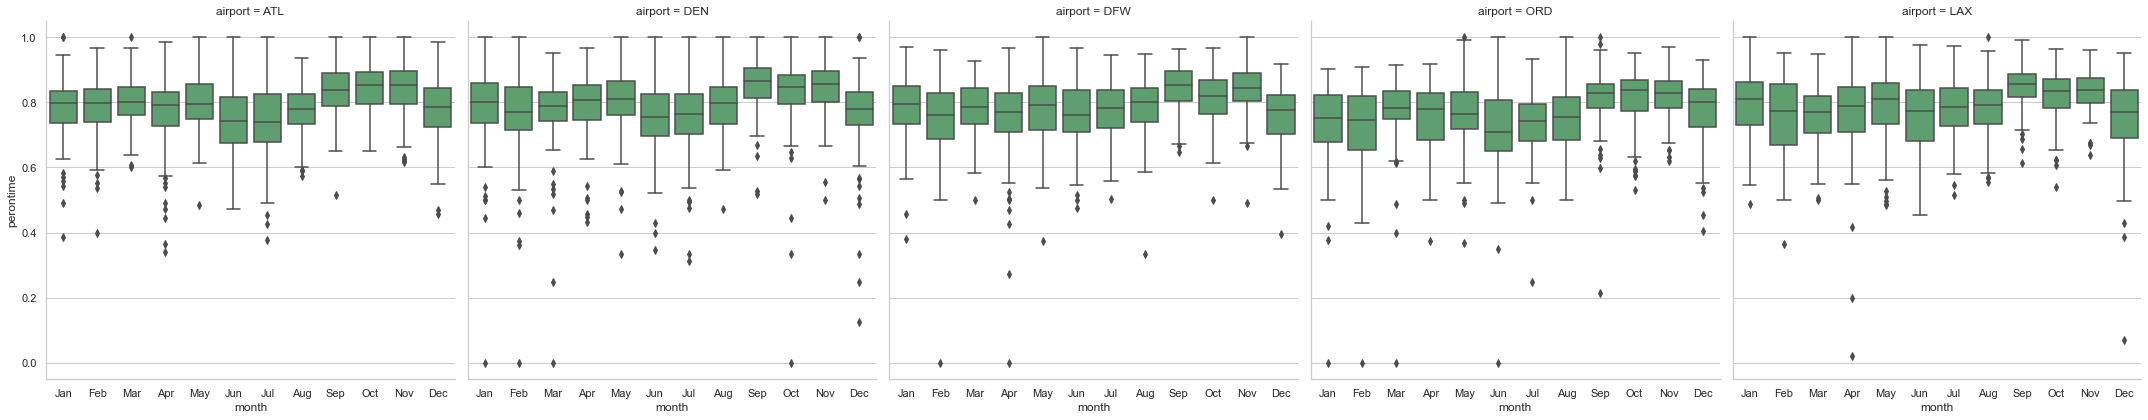

In [209]:
base_color = sns.color_palette()[2]
g = sns.FacetGrid(data = tier1, col = 'airport', size = 6)
g.map(sns.boxplot, 'month', 'perontime', color=base_color)
g.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

Four of the five airports show a lower percentage of flights on time in February and June, except Atlanta, where it's June and July. Seasonality in February is particularly marked in Dallas (DFW) and Chicago (ORD).

In [210]:
df14=delays.filter(['airport', 'year', 'month', 'perontime'], axis=1)

In [211]:
tier2=df13.query('airport in ["PHX", "SFO", "IAH", "CLT", "LAS"]')

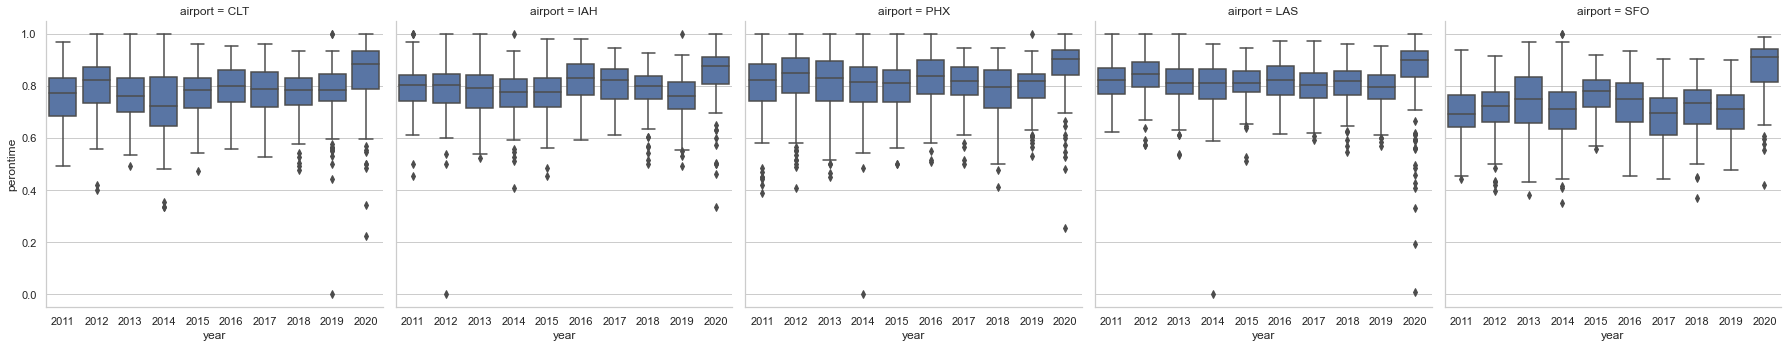

In [212]:
base_color = sns.color_palette()[0]
g = sns.FacetGrid(data = tier2, col = 'airport', size = 5)
g.map(sns.boxplot, 'year', 'perontime', color=base_color);

For all five airports in Tier 2, 2020 was also the year with the highest percentage of flights on time, as measured by the median value and 75th percentile, though there are quite a few outliers in the bottom of the distribution. No particular is the lowest for all or most, like in the case of 2014 with the top airlines. SFO shows the largest ranges in the group, specially in years 2013, 2014 and 2016.

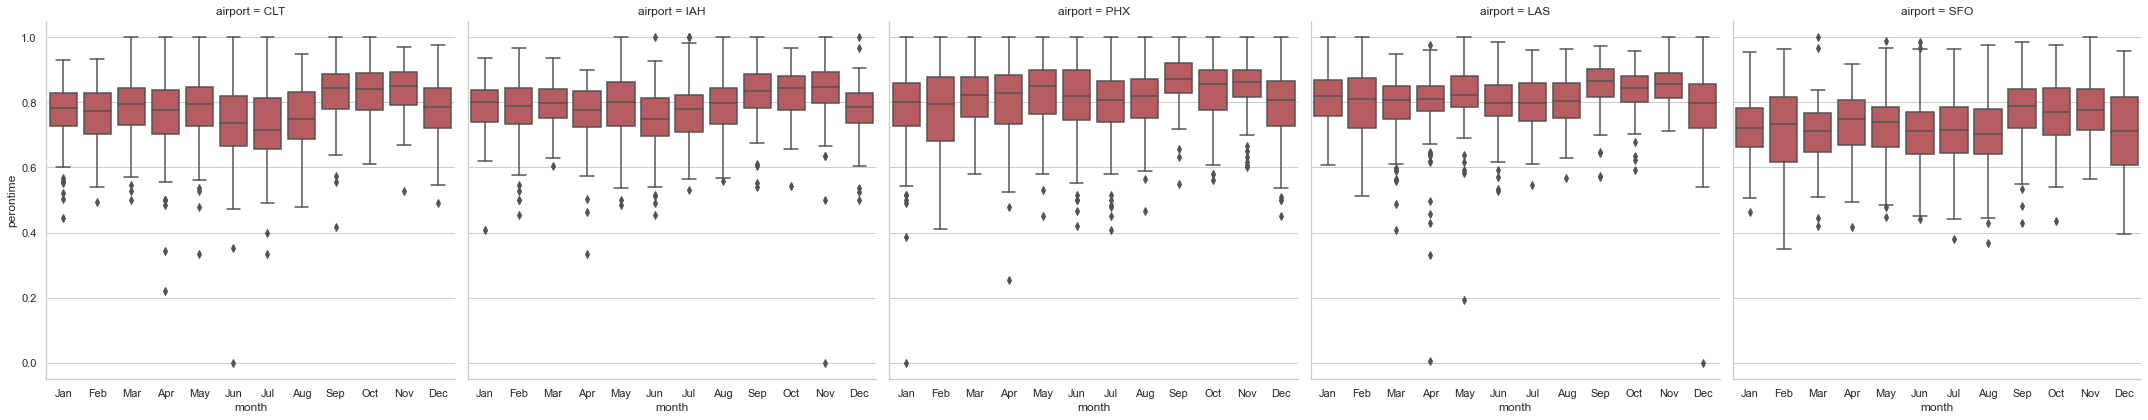

In [213]:
base_color = sns.color_palette()[3]
g = sns.FacetGrid(data = tier2, col = 'airport', size = 6)
g.map(sns.boxplot, 'month', 'perontime', color=base_color)
g.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

In the second tier, percentage of ontime flights diminishes seasonally in June and July for Charlotte (CLT) and Houston (IAH). The same happens in February for Phoenix (PHX), Las Vegas (LAS) and San Francisco (SFO).

#### NAS delays at the busiest airports

If we want to track airport efficiency, we can plot NAS delays against number of flights. We expect that larger airports indeed have higher NAS delays because non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control are impacted directly by number of flights. The BTS considers that these conditions can be managed and improved on. Hence, they are separate from an expected "weather" event.

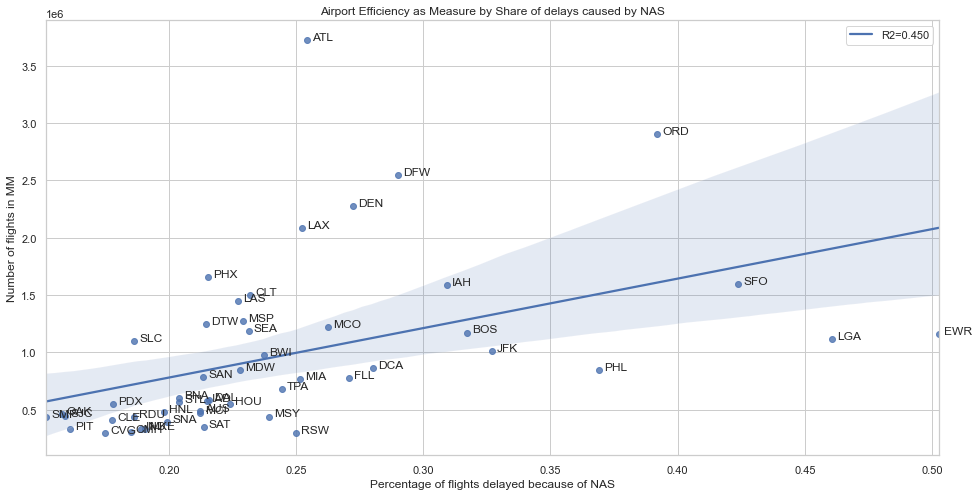

In [219]:
from scipy import stats
plt.figure(figsize=(16,8))
base_color = sns.color_palette()[0]

slope, intercept, r_value, p_value, std_err = stats.linregress(top50['per_nas_delay'],top50['arr_flights'])

ax = sns.regplot(x="per_nas_delay", y="arr_flights", data=top50, color=base_color, 
 line_kws={'label':"R2={0:.3f}".format(r_value)})

plt.xlabel('Percentage of flights delayed because of NAS')
plt.ylabel('Number of flights in MM')
plt.title('Airport Efficiency as Measure by Share of delays caused by NAS')
ax.legend()

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.002, point['y'], str(point['val']))

label_point(top50.per_nas_delay, top50.arr_flights, top50.airport, plt.gca())

plt.show(); 

As expected there is a positive relationship between number of flights and percentage of flights delayedy because of NAS. The R2 is not negligible, at 0.442. SFO, LGA and EWR have the highest percentages of delayed flights, yet the five busiest airpots ATL, ORD, DFW, DEN and LAX perform better than expected.

## Conclusions

From the analysis we can derive the following conclusions for each of the four cross sectional dimensions: 
    
**Yearly Trend**
- There is no yearly trend in the percentage of online flights during the decade of data, as 2020 is the best year, 2016 the second best, with 2012 a close third. This is likely the effect of different weather conditions between years.  
- 2020 was the year with the highest percentage of flights on time, as measured by the median value and 75th percentile, though there are quite a few outliers in the bottom of the distribution. Covid could have played a part, as flights were not at full capacity during several months.

**Seasonality**
- Seasonality is present, with a lower of flights ontime, on average, during the months of January, June and July, at the peak of winter and peak of summer. Some airlines like Skywest present a different seasonality, perhaps because of the geographical difference of their routes with others.    

**Carriers**
- The percentage of delays attributable to the carriers ranges between 30 to 50% for the top 5 airlines. This is the case for most years except for 2020, where the ranges seem to be more extreme. United Airlines, on average, shows less percentage of delays atributed to the carrier.
- One major airline, Delta, has the best ontime performance, while another other major ailine, Express is the worst of the 21 carriers in the set. Delta has maintained a fairly even perfromance through the years, with a median value above 80% on time. ExpressJet Airlines is the most uneven performer of the top 5 airlines, with median ontime performance below 80% in all years except 2020.

**Airports**
- There is negative correlation between number of flights and percentage of on-time flights, but the relationship is not that strong. Despite the volume of flights, the percentage of ontime flights for most of airports is in the range between 78% and 80%. Santa Ana (SNA), Oakland (OAK), Honolulu (HNL) and San Jose (SJC) are the most likely to be on time. Conversely, Newark (EWR), La Guardia (LGA) and San Francisco(SFO) are the least likely to be in time.
- There is a positive relationship between number of flights and percentage of flights delayedy because of NAS. SFO, LGA and EWR have the highest percentages of delayed flights, yet the five busiest airpots ATL, ORD, DFW, DEN and LAX perform better than expected.